In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# reading dataframe
esports = pd.read_csv('high_diamond_ranked_10min.csv')
esports.dropna()
esports.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [112]:
print(esports.shape[0], esports.shape[1])

9879 40


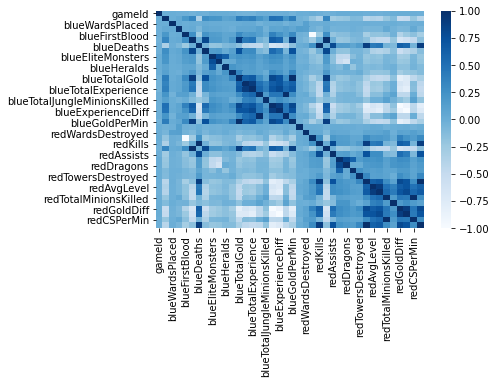

In [113]:
sns.heatmap(esports.corr(), cmap = 'Blues')

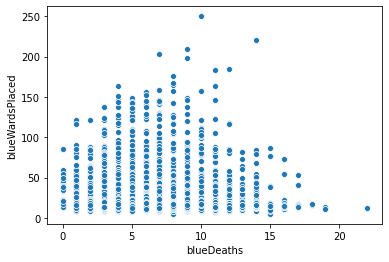

In [114]:
sns.scatterplot('blueDeaths', 'blueWardsPlaced', data = esports)

In [115]:
esports['blueKDA'] = (esports['blueKills'] + esports['blueAssists']) / esports['blueDeaths'] 
esports.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueKDA
0,4519157822,0,28,2,1,9,6,11,0,0,...,16567,6.8,17047,197,55,-643,8,19.7,1656.7,3.333333
1,4523371949,0,12,1,0,5,5,5,0,0,...,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,2.000000
2,4521474530,0,15,0,0,7,11,4,1,1,...,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,1.000000
3,4524384067,0,43,1,0,4,5,5,1,0,...,16478,7.0,17961,235,47,1321,7,23.5,1647.8,1.800000
4,4436033771,0,75,4,0,6,6,6,0,0,...,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,2.000000


In [116]:
esports = esports[np.isfinite(esports).all(1)]
esports['blueDragons'].max()

1

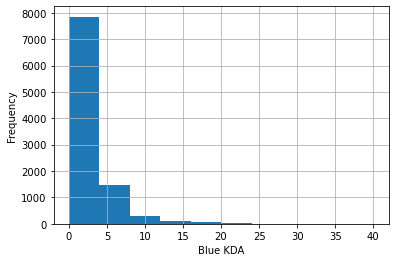

In [117]:
plt.hist('blueKDA', data = esports)
plt.xlabel('Blue KDA')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [118]:
esports2 = esports[['blueWins', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueGoldDiff']]
new_esports = esports2.copy()
new_esports.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueGoldDiff
0,0,1,9,6,11,0,0,0,0,17210,6.6,643
1,0,0,5,5,5,0,0,0,0,14712,6.6,-2908
2,0,0,7,11,4,1,1,0,0,16113,6.4,-1172
3,0,0,4,5,5,1,0,1,0,15157,7.0,-1321
4,0,0,6,6,6,0,0,0,0,16400,7.0,-1004


In [119]:
X = new_esports[['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
                 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueGoldDiff']]
Y = new_esports['blueWins']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [120]:
# scaling the data
#scaler = MinMaxScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [121]:
# grid search
criterion = ['gini', 'entropy']
max_depth = range(1, 21)
splitter = ['best', 'random']
dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtc, cv = 10, param_grid = dict(criterion = criterion, max_depth = max_depth, splitter = splitter))

# fitting with grid_search
results = grid_search.fit(X_train, Y_train)

In [122]:
# printing results of grid search
print('Best Parameters:', results.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


In [123]:
new_esports.median()

blueWins                   0.0
blueFirstBlood             1.0
blueKills                  6.0
blueDeaths                 6.0
blueAssists                6.0
blueEliteMonsters          0.0
blueDragons                0.0
blueHeralds                0.0
blueTowersDestroyed        0.0
blueTotalGold          16394.0
blueAvgLevel               7.0
blueGoldDiff             -11.0
dtype: float64

In [124]:
dt_md = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, splitter = 'random').fit(X_train, Y_train)

In [125]:
# predicting on test

situation1 = {'feature' : ['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
                 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueGoldDiff'],
              'value' : [1, 6, 6, 6, 2, 1, 1, 1, 16394, 7, -11]}

situation1_df = pd.DataFrame(situation1)
situation1_df.T

,0,1,2,3,4,5,6,7,8,9,10
feature,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueGoldDiff
value,1,6,6,6,2,1,1,1,16394,7,-11


In [126]:
values = [[1, 6, 6, 6, 2, 1, 1, 1, 16394, 7, -11]]
pred1 = dt_md.predict_proba(values).reshape(-1, 1)
print('winner is:', dt_md.predict(values)) # blue team is 1
print('blue team win probability is', list(pred1[1]*100))
print('red team win probability is', list(pred1[0]*100))

winner is: [1]
blue team win probability is [61.53846153846154]
red team win probability is [38.46153846153847]


In [127]:
# predicting on test

situation2 = {'feature' : ['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
                 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueGoldDiff'],
              'value' : [1, 6, 6, 6, 2, 1, 1, 1, 16394, 9, 3000]}

situation2_df = pd.DataFrame(situation2)
situation2_df.T

,0,1,2,3,4,5,6,7,8,9,10
feature,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueGoldDiff
value,1,6,6,6,2,1,1,1,16394,9,3000


In [128]:
values2 = [[1, 6, 6, 6, 2, 1, 1, 1, 16394, 9, 3000]]
pred2 = dt_md.predict_proba(values2).reshape(-1, 1)
print('winner is:', dt_md.predict(values2)) # blue team is 1
print('blue team win probability is', list(pred2[1]*100))
print('red team win probability is', list(pred2[0]*100))

winner is: [1]
blue team win probability is [83.87096774193549]
red team win probability is [16.129032258064516]


In [129]:
# predicting on test

situation3 = {'feature' : ['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
                 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueGoldDiff'],
              'value' : [0, 4, 8, 6, 0, 0, 0, 0, 14000, 8, -1000]}

situation3_df = pd.DataFrame(situation3)
situation3_df.T

,0,1,2,3,4,5,6,7,8,9,10
feature,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueGoldDiff
value,0,4,8,6,0,0,0,0,14000,8,-1000


In [130]:
values3 = [[0, 4, 8, 6, 0, 0, 0, 0, 14000, 8, -1000]]
pred3 = dt_md.predict_proba(values3).reshape(-1, 1)
print('winner is:', dt_md.predict(values3)) # blue team is 1
print('blue team win probability is', list(pred3[1]*100))
print('red team win probability is', list(pred3[0]*100))

winner is: [0]
blue team win probability is [28.88198757763975]
red team win probability is [71.11801242236024]


In [132]:
# classification report
predictions = dt_md.predict(X_test)
report = classification_report(Y_test, predictions)
print('Classification Report : \n', report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       965
           1       0.74      0.67      0.70       997

    accuracy                           0.71      1962
   macro avg       0.71      0.71      0.71      1962
weighted avg       0.71      0.71      0.71      1962

